In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('dataset/dataset.csv', encoding='ISO-8859-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [7]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [8]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
df.duplicated().sum()

403

In [13]:
df = df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(5169, 2)

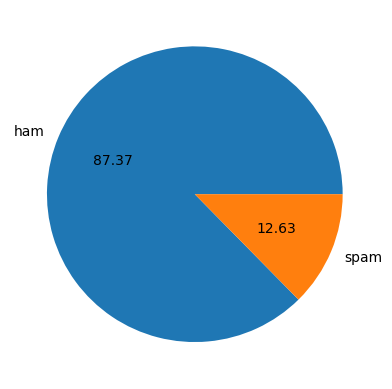

In [16]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = '%0.2f')
plt.show()

In [17]:
!pip install nltk

In [18]:
import nltk

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\AAYUSHMAAN
[nltk_data]     TAWER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
df['num_characters'] = df['text'].apply(len)

In [21]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [22]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [23]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
#ham
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
#spam
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [26]:
import seaborn as sns

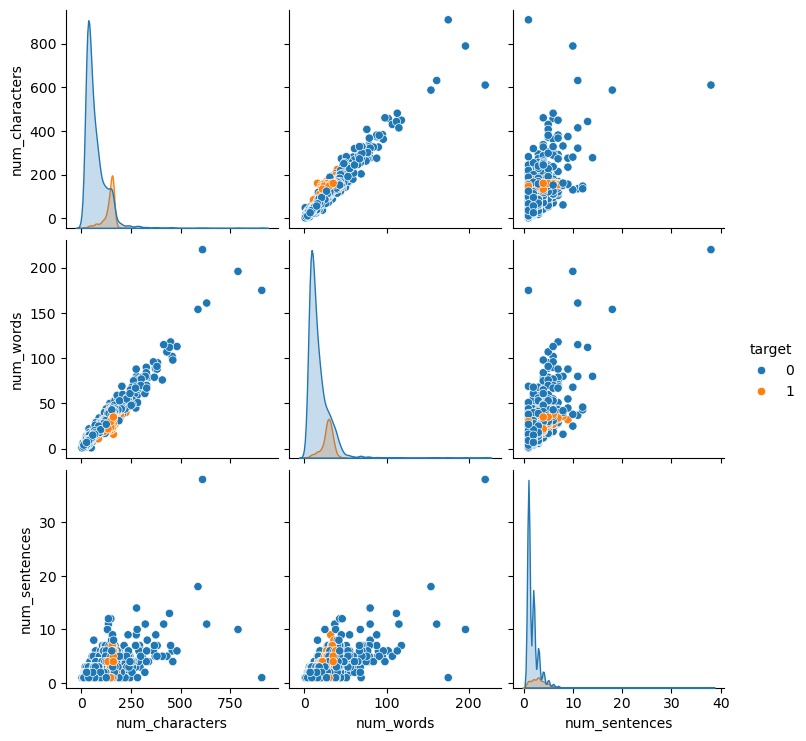

In [27]:
sns.pairplot(df, hue = 'target')

In [28]:
df.dtypes

target             int32
text              object
num_characters     int64
num_words          int64
num_sentences      int64
dtype: object

<Axes: >

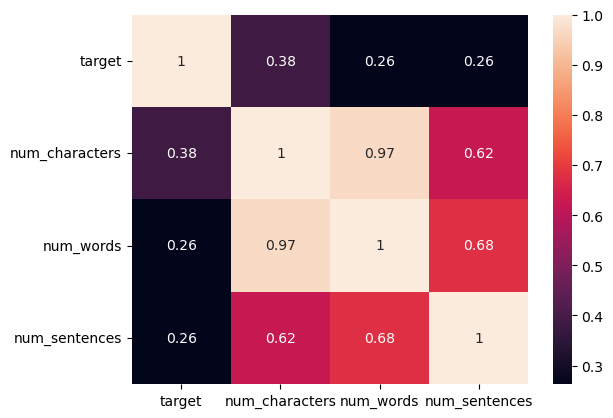

In [29]:
numeric_df = df.select_dtypes(include=['float64', 'int64','int32'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot = True)


In [30]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to C:\Users\AAYUSHMAAN
[nltk_data]     TAWER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for char in text:
        if char.isalnum():
            y.append(char)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [32]:
df['transformed_text'] = df['text'].apply(transform_text)

In [33]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [34]:
from wordcloud import WordCloud
wc = WordCloud(width = 1500, height = 1500, min_font_size= 10, background_color='white')

In [35]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = ' '))

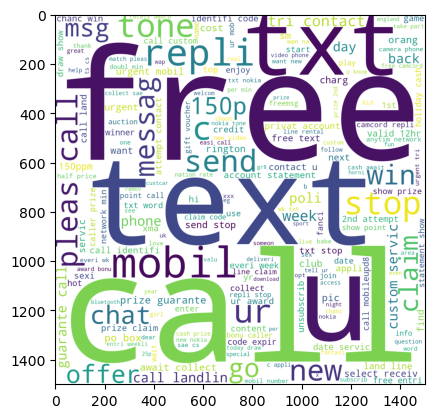

In [36]:
plt.imshow(spam_wc)

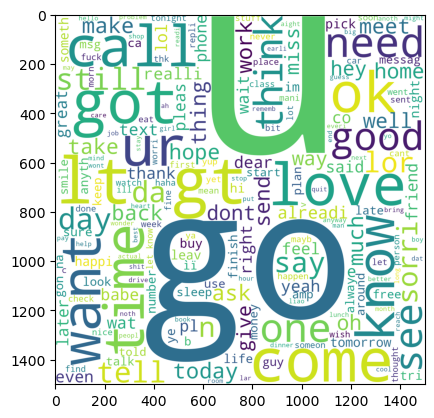

In [37]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = ' '))
plt.imshow(ham_wc)

In [38]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

C:\Users\AAYUSHMAAN TAWER\AppData\Local\Temp\ipykernel_2516\4934892.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1], palette="viridis")


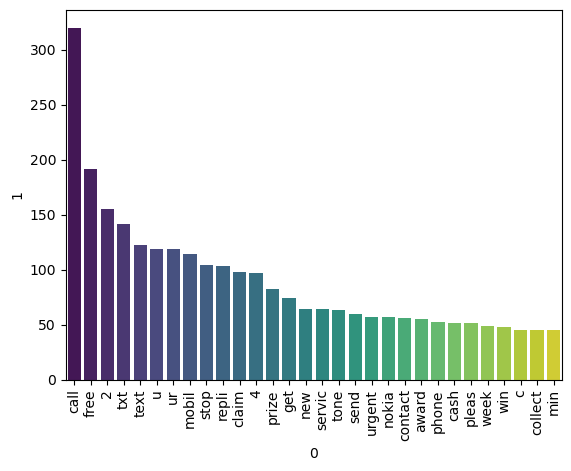

In [39]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1], palette="viridis")
plt.xticks(rotation = 'vertical')
plt.show()

In [40]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

C:\Users\AAYUSHMAAN TAWER\AppData\Local\Temp\ipykernel_2516\1549789114.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1], palette="viridis")


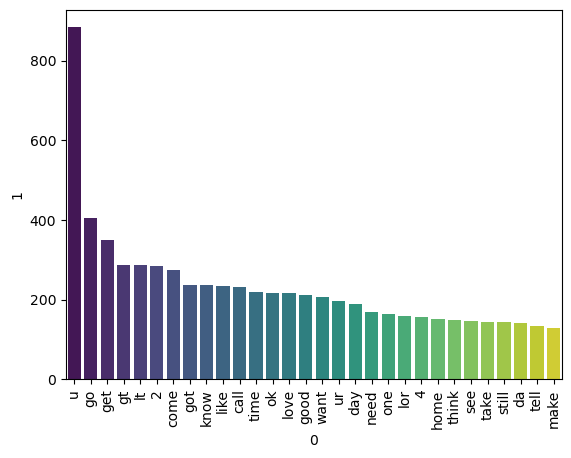

In [41]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1], palette="viridis")
plt.xticks(rotation = 'vertical')
plt.show()

In [42]:
#Model 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
cv = CountVectorizer()

In [43]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [44]:
X[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [45]:
X.shape

(5169, 3000)

In [46]:
y = df['target'].values

In [47]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=2, train_size=0.2)

In [49]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [50]:
gNB = GaussianNB()
mNB = MultinomialNB()
bNB = BernoulliNB()

In [51]:
#GaussianNB
gNB.fit(X_train, y_train)
y_pred1 = gNB.predict(X_test)
print("Accuracy Score: " + str(accuracy_score(y_test, y_pred1)))
print("Confusion Matrix: " + str(confusion_matrix(y_test, y_pred1)))
print("Precision Score: " + str(precision_score(y_test, y_pred1)))

Accuracy Score: 0.8907156673114119
Confusion Matrix: [[3272  359]
 [  93  412]]
Precision Score: 0.5343709468223087


In [52]:
#MultinomialNB
mNB.fit(X_train, y_train)
y_pred2 = mNB.predict(X_test)
print("Accuracy Score: " + str(accuracy_score(y_test, y_pred2)))
print("Confusion Matrix: " + str(confusion_matrix(y_test, y_pred2)))
print("Precision Score: " + str(precision_score(y_test, y_pred2)))

Accuracy Score: 0.9320599613152805
Confusion Matrix: [[3631    0]
 [ 281  224]]
Precision Score: 1.0


In [53]:
#BernoullNB
bNB.fit(X_train, y_train)
y_pred3 = bNB.predict(X_test)
print("Accuracy Score: " + str(accuracy_score(y_test, y_pred3)))
print("Confusion Matrix: " + str(confusion_matrix(y_test, y_pred3)))
print("Precision Score: " + str(precision_score(y_test, y_pred3)))

Accuracy Score: 0.9489845261121856
Confusion Matrix: [[3626    5]
 [ 206  299]]
Precision Score: 0.9835526315789473


In [54]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mNB, open('model.pkl','wb'))

In [55]:
#Model Improvement

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [57]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [58]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [59]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [60]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9617988394584139, 0.9460154241645244)

In [61]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9617988394584139
Precision -  0.9460154241645244
For  KN
Accuracy -  0.8861218568665378
Precision -  1.0
For  NB
Accuracy -  0.9320599613152805
Precision -  1.0
For  DT
Accuracy -  0.9301257253384912
Precision -  0.7755102040816326
For  LR
Accuracy -  0.925531914893617
Precision -  0.8745247148288974
For  RF
Accuracy -  0.9613152804642167
Precision -  0.9859154929577465


C:\Users\AAYUSHMAAN TAWER\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9480174081237911
Precision -  0.868020304568528
For  BgC
Accuracy -  0.937137330754352
Precision -  0.7803203661327232
For  ETC
Accuracy -  0.9627659574468085
Precision -  0.9558441558441558
For  GBDT
Accuracy -  0.9376208897485493
Precision -  0.8110831234256927
For  xgb
Accuracy -  0.9458413926499033
Precision -  0.8047722342733189


In [62]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [63]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.886122,1.000000
2,NB,0.932060,1.000000
5,RF,0.961315,0.985915
8,ETC,0.962766,0.955844
0,SVC,0.961799,0.946015
4,LR,0.925532,0.874525
6,AdaBoost,0.948017,0.868020
9,GBDT,0.937621,0.811083
10,xgb,0.945841,0.804772
7,BgC,0.937137,0.780320


In [64]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [65]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.886122
1,NB,Accuracy,0.932060
2,RF,Accuracy,0.961315
3,ETC,Accuracy,0.962766
4,SVC,Accuracy,0.961799
5,LR,Accuracy,0.925532
6,AdaBoost,Accuracy,0.948017
7,GBDT,Accuracy,0.937621
8,xgb,Accuracy,0.945841
9,BgC,Accuracy,0.937137


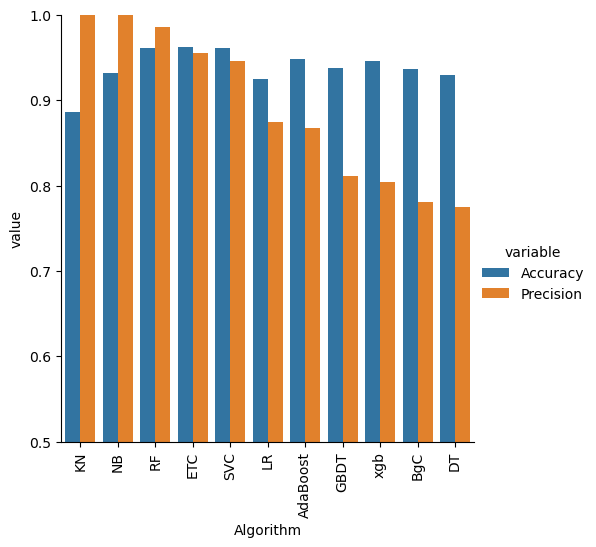

In [66]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [67]:
# Model Improvement
# Changing the max_features parameter of TfIdf

In [68]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [69]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [70]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [71]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [72]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [73]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.886122,1.000000,0.886122,1.000000,0.886122,1.000000,0.886122,1.000000
1,NB,0.932060,1.000000,0.932060,1.000000,0.932060,1.000000,0.932060,1.000000
2,RF,0.961315,0.985915,0.961315,0.985915,0.961315,0.985915,0.961315,0.985915
3,ETC,0.962766,0.955844,0.962766,0.955844,0.962766,0.955844,0.962766,0.955844
4,SVC,0.961799,0.946015,0.961799,0.946015,0.961799,0.946015,0.961799,0.946015
5,LR,0.925532,0.874525,0.925532,0.874525,0.925532,0.874525,0.925532,0.874525
6,AdaBoost,0.948017,0.868020,0.948017,0.868020,0.948017,0.868020,0.948017,0.868020
7,GBDT,0.937621,0.811083,0.937621,0.811083,0.937621,0.811083,0.937621,0.811083
8,xgb,0.945841,0.804772,0.945841,0.804772,0.945841,0.804772,0.945841,0.804772
9,BgC,0.937137,0.780320,0.937137,0.780320,0.937137,0.780320,0.937137,0.780320


In [74]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [75]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [76]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [77]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9697775628626693
Precision 0.9797979797979798
